In [15]:
from ISLP import load_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import confusion_table
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
Boston = load_data('Boston')

In [3]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [4]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [5]:
Boston['crime_rate'] = (Boston['crim'] > Boston['crim'].median()).astype(int)
Boston = Boston.drop(columns = ['crim'])

In [6]:
Boston.corr()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crime_rate
zn,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,-0.436151
indus,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,0.603260
chas,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.070097
nox,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,0.723235
rm,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,-0.156372
age,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,0.613940
dis,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,-0.616342
rad,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,0.619786
tax,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,0.608741
ptratio,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,0.374044,-0.507787,0.253568


In [7]:
"""
we can drop the chas as an indicator since it has low correlation.
NO. thats a bad thing to do. 
because, correlation helps understand the linearity. but it might lead to good fit in non linear models. or there might be interaction effect

next we can plot histogram
"""

'\nwe can drop the chas as an indicator since it has low correlation.\nNO. thats a bad thing to do. \nbecause, correlation helps understand the linearity. but it might lead to good fit in non linear models. or there might be interaction effect\n\nnext we can plot histogram\n'

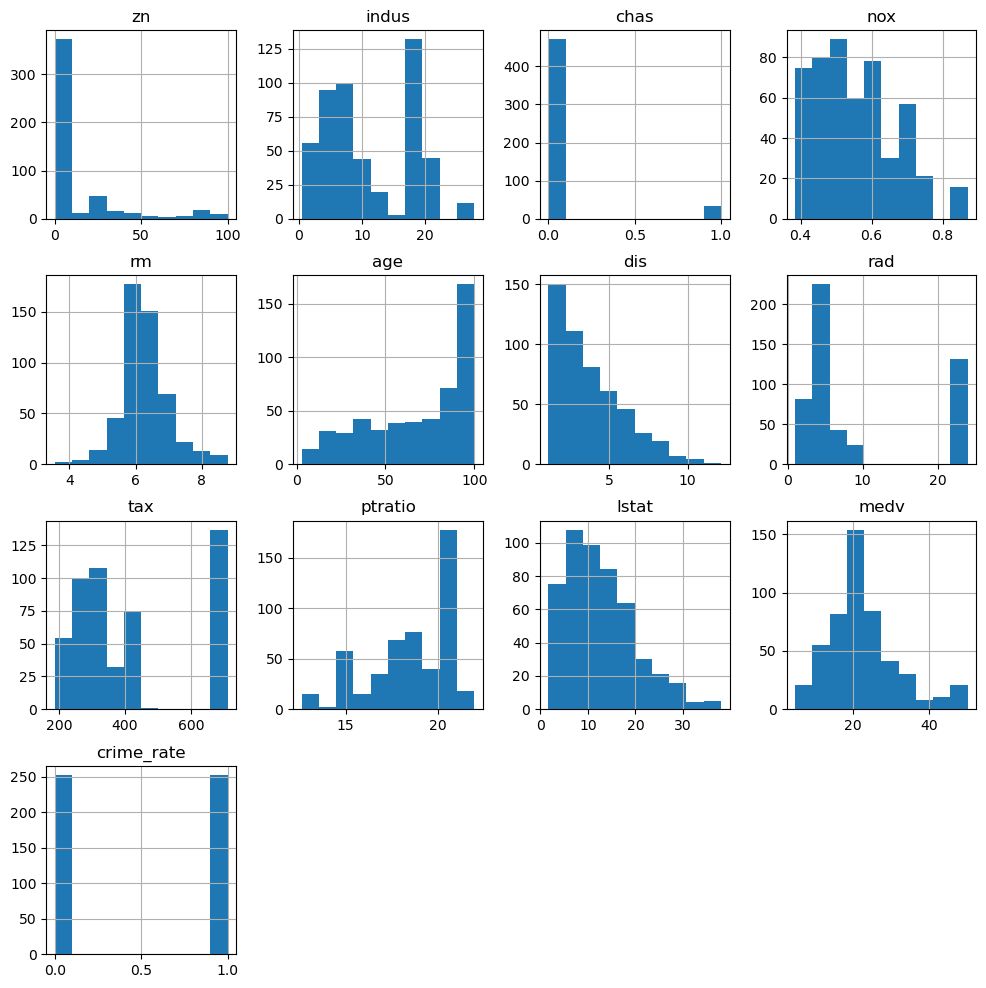

In [8]:
Boston.hist(figsize = (12,12));

In [ ]:
"""
the crime_rate seems to be having equal no of observations
chas is biased in the dataset
we can see skewness in few other predictors

i will select the predictors which have correlation more than 0.5 in absolute value with crime_rate
indus, nox, age, dis, rad, tax
"""

In [12]:
X = Boston[['indus', 'nox', 'age', 'dis', 'rad', 'tax']]
y = Boston['crime_rate']

def get_error_rate(conf_mat):
    return (conf_mat.iloc[0, 1] + conf_mat.iloc[1, 0])/conf_mat.sum().sum()
    
def fit_and_get_error_rate(model, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    mdl = model
    
    mdl.fit(X_train, y_train)
    pred = mdl.predict(X_test)
    conf_mat = confusion_table(pred, y_test)
    return get_error_rate(conf_mat)

In [13]:
for model in [LDA(), QDA(), LogisticRegression(max_iter=1000), GaussianNB()]:
    print(f'{model.__str__().split("(")[0]}: {fit_and_get_error_rate(model, X, y)}\n')

LinearDiscriminantAnalysis: 0.17763157894736842

QuadraticDiscriminantAnalysis: 0.125

LogisticRegression: 0.17763157894736842

GaussianNB: 0.19078947368421054



In [ ]:
"""
QDA performs better with 12.5% error rate
"""

(6, np.float64(0.06403940886699508))

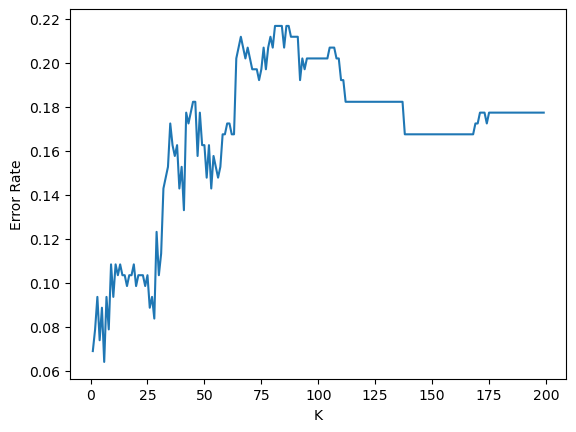

In [16]:
scaler = StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)

X_std = scaler.fit_transform(X)

feature_std = pd.DataFrame(
                 X_std,
                 columns=X.columns);

X_train_std, X_test_std, y_train_std, y_test_std  = train_test_split(feature_std, y, test_size=0.4,random_state=1)

error_rate = {}
for k in range(1, 200):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train_std, y_train_std)
    knn_pred = knn.predict(X_test_std)
    conf_mat = confusion_table(knn_pred, y_test_std)
    error_rate[k] = get_error_rate(conf_mat)

plt.plot(error_rate.keys(), error_rate.values())
plt.xlabel('K')
plt.ylabel('Error Rate');
k_min = min(error_rate, key=error_rate.get)
k_min, error_rate[k_min]

In [ ]:
"""
minimum error rate is achieved with k = 6, error rate being 6.4%
"""